# Wai Yu Amanda, Ng
## Student number: 1008217350
## UTORid: ngwai11
## email: waiyuamanda.ng@mail.utoronto.ca

# Part I
---

$$
\begin{align*}
&\color{white}{\propto}{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

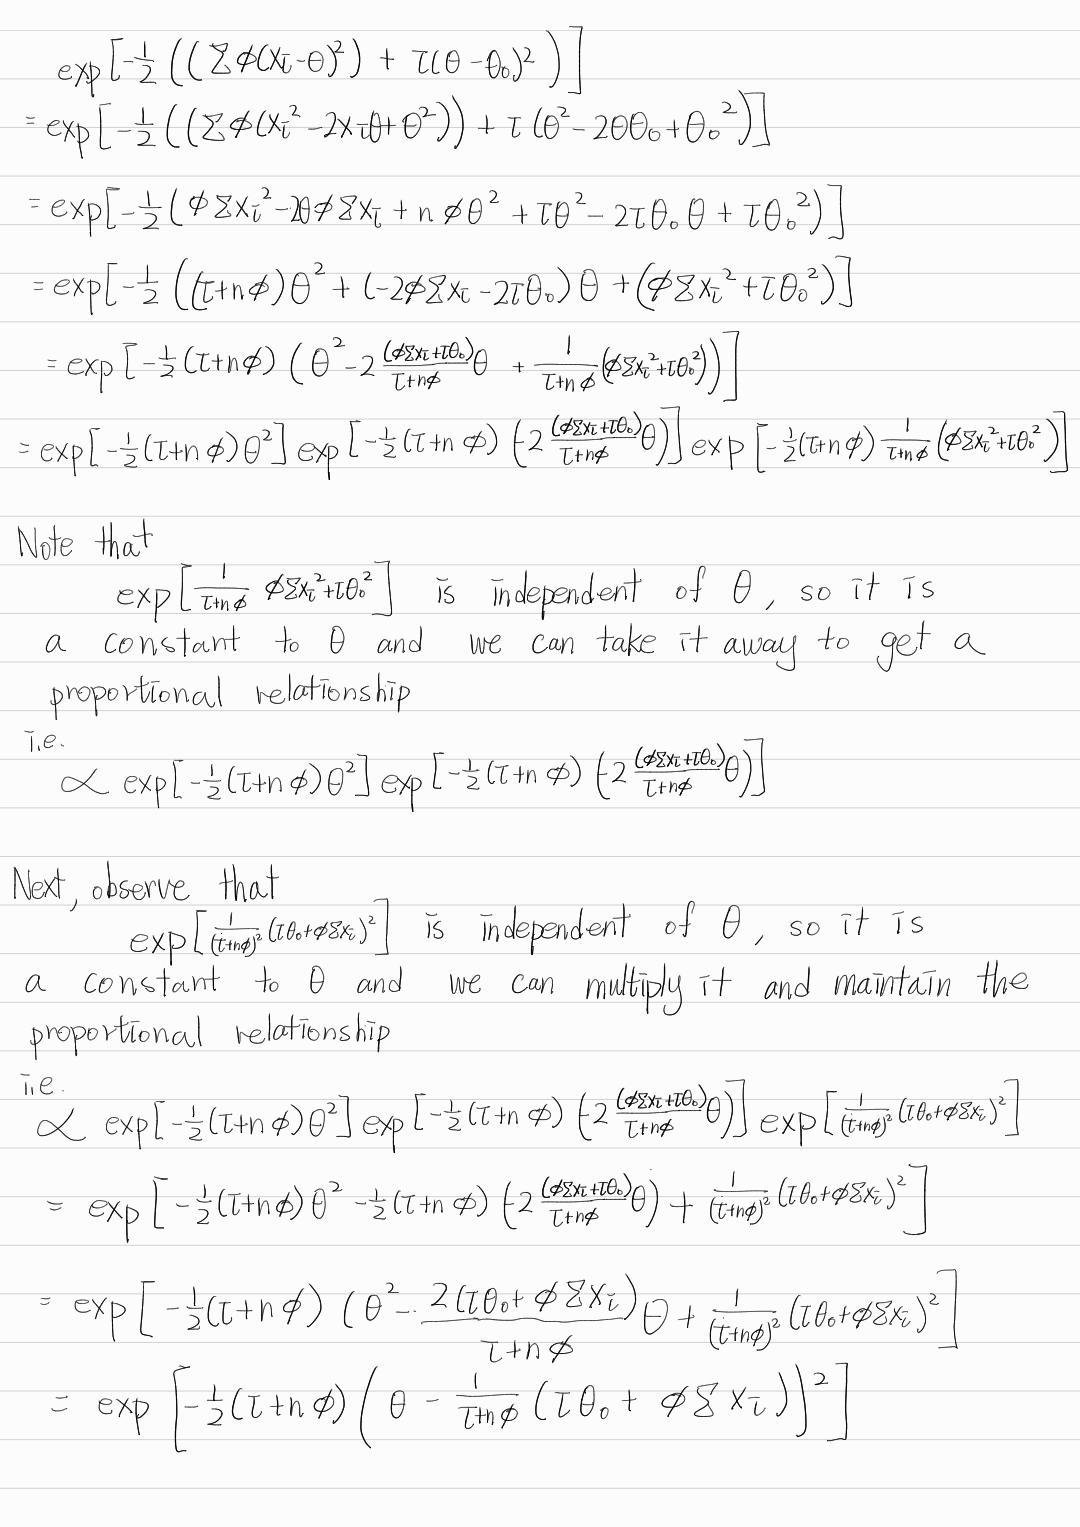

In [3]:
from IPython.display import Image
Image("Part1-image.png")

# Part II

## 1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```  

In [92]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import random 

random.seed(518)

n = 3; x = stats.norm(loc=0,scale=1).rvs(3); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 

print("The data are" +str(x))

The data are[0.36246801 0.67292105 0.16831152]


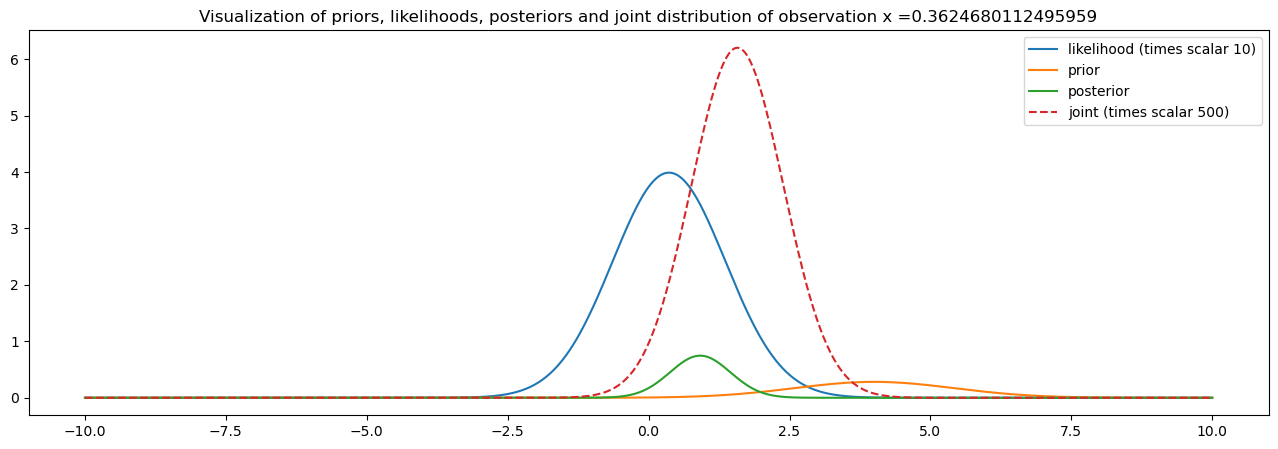

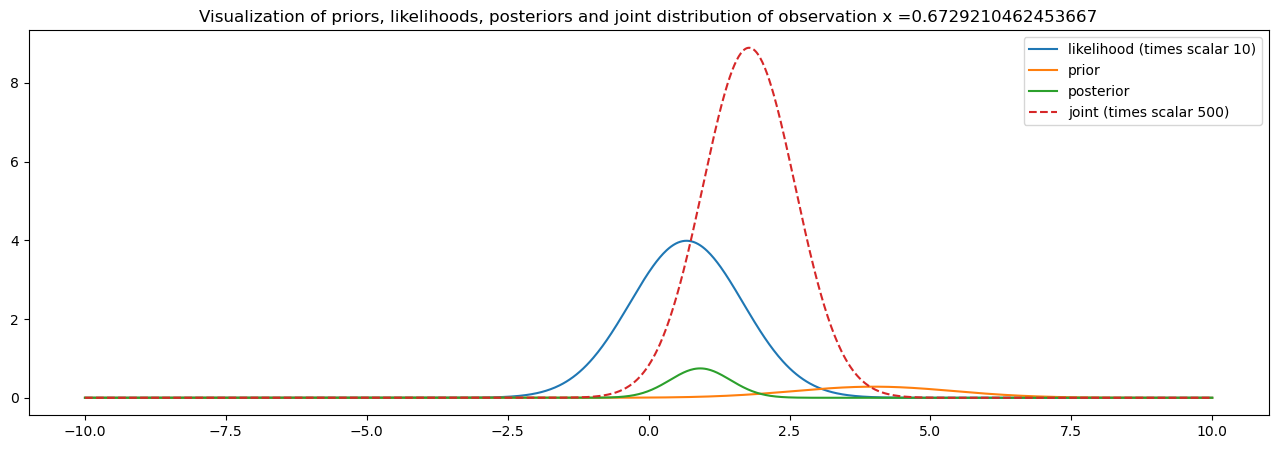

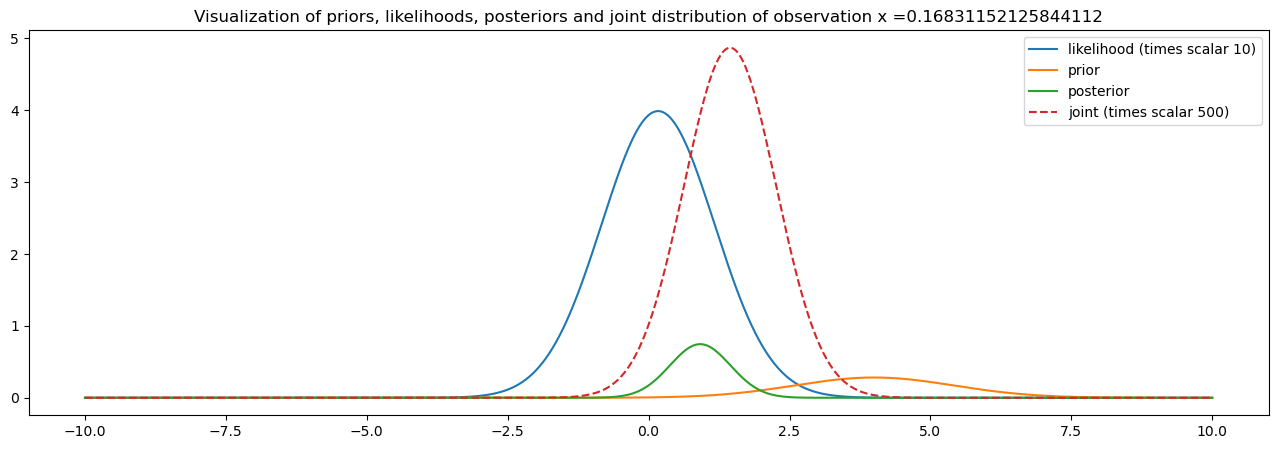

In [93]:
for x_i in x:
    likelihood = stats.norm.pdf(np.array([x_i])[:,np.newaxis]*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) 
    prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) 
    c,c2 = 500,10; 
    joint = c*likelihood*prior # elementwise multiplication 
    posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
    plt.figure(figsize=(16,5)); plt.plot(parameter_domain, c2*likelihood, label="likelihood (times scalar "+str(c2)+")"); plt.plot(parameter_domain, prior, label="prior"); plt.plot(parameter_domain, posterior, label="posterior"); plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")"); plt.legend(); plt.title("Visualization of priors, likelihoods, posteriors and joint distribution of observation x =" +str(x_i));

## 2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`

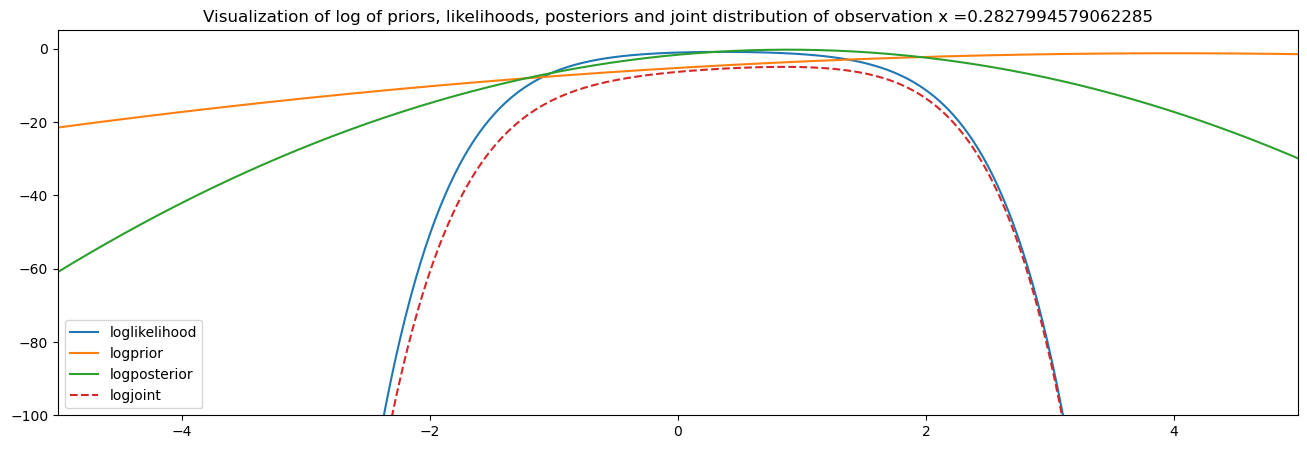

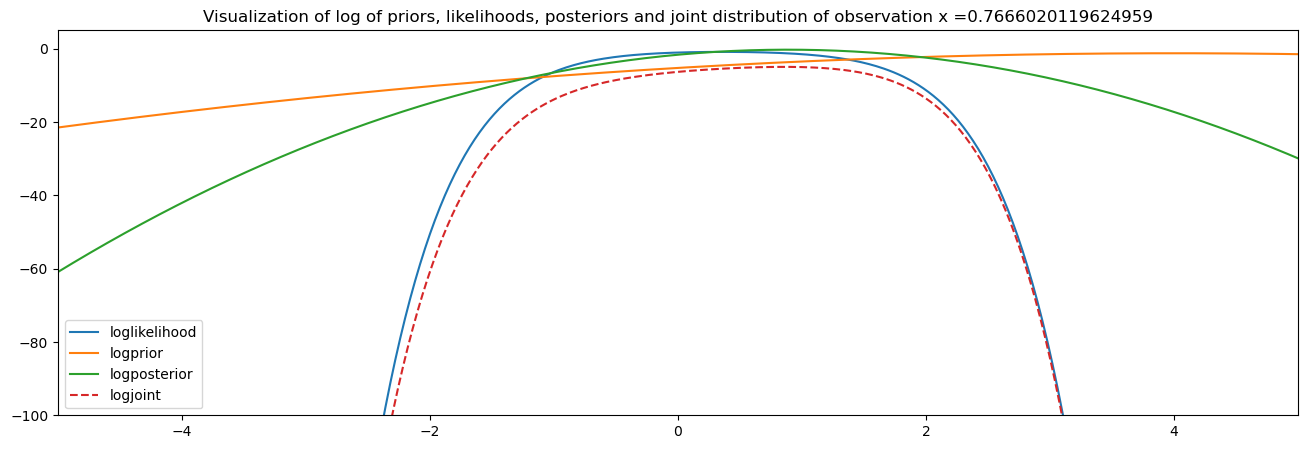

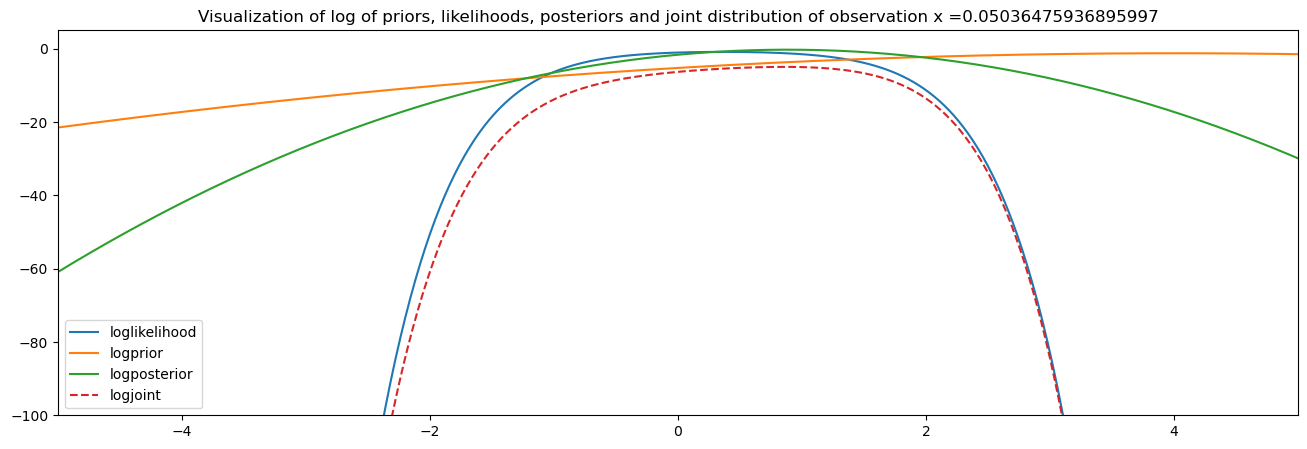

In [94]:
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 

for x_i in x:

    loglikelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) 
    
    logprior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)
    
    logjoint = loglikelihood + logprior

    logposterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)

    plt.figure(figsize=(16,5)); 
    plt.plot(parameter_domain, loglikelihood, label="loglikelihood"); 
    plt.plot(parameter_domain, logprior, label="logprior"); 
    plt.plot(parameter_domain, logposterior, label="logposterior"); 
    plt.plot(parameter_domain, logjoint, linestyle="--", label="logjoint");  
    plt.legend(); plt.title("Visualization of log of priors, likelihoods, posteriors and joint distribution of observation x =" +str(x_i));
    plt.ylim(-100,5); plt.xlim(-5,5);

## 3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?

The posterior distribution a truncated proper normal distribution.

## 4. What's the difference between a log likelihood and log posterior when improper prior is used? Hint: is has something to do with the log of the marginal likelihood constant.

Given a improper prior proportional to 1, we can say the prior is just some constant c.

When c = 1, log likelihood and log posterior differ by the log of the marginal likelihood constant.

Since posterior is a product of likelihood and prior divided by the marginal likelihood constant, log of posterior is log likelihood plus log prior (i.e. log of a constant) minus log of the marginal likelihood constant. 

Then log posterior = log likelihood + (log prior - log of the marginal likelihood constant)

Hence, when c = 1, log prior = log 1 = 0

We obtain: log posterior = log likelihood - log of the marginal likelihood constant

So, log posterior is larger than log likelihood by log of the marginal likelihood constant.